#**Assignment Overview**

You will have to work with two primary datasets:
1. Bitcoin Market Sentiment Dataset
     Columns:
     * Date
     * Classification (Fear/Greed)
2. Historical Trader Data from Hyperliquid

     Columns include:
    * account
    * symbol
    * execution price
    * size
    * side
    * time
    * start position
    * event
    * closedPnL
    * leverage, etc.
**Our goal : Your objective is to explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.**


closedPnL
* closed Profit and Loss .
* Positive means profit , negative means loss
* needed to analyze trader performance


side     

*   direction of trade
*   buy : Trader expects price to go up
*   sell : Trader expects price to go down


In [1]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading data as pandas dataframe
historical_df=pd.read_csv('/content/historical_data.csv')
sentiment_df=pd.read_csv('/content/fear_greed_index.csv')
##Getting to know the basic structure of dataset
print(historical_df.columns)
print(f"Historical data shape : {historical_df.shape}")
print(sentiment_df.columns)
print(f"Sentiment data shape : {sentiment_df.shape}")

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Historical data shape : (211224, 16)
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Sentiment data shape : (2644, 4)


In [3]:
print(sentiment_df.head())
print(f"sentiment data shape : {sentiment_df.shape}")

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
sentiment data shape : (2644, 4)


# **Data Preprocessing**


*   Check the type of data stored in the dataframe
*   Handle missing values or null values
*   Convert the timestamp column of historical dataframe to date time format to further map with the date column of sentiment df
*  Merging the dfs based on timestamp



In [4]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


***There are no null values or missing values in any dataframe so we can proceed to merging the dfs using dates***

**Attach the sentiment to each trade based on date**

In [6]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
historical_df['date'] = historical_df['Timestamp IST'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
#Merging the dfs using the dates
merged_df = historical_df.merge(sentiment_df[['date', 'classification']], on='date', how='left')


In [7]:
merged_df.rename(columns={'classification':'Sentiment'},inplace=True)

In [8]:
print(merged_df.shape)
print(merged_df.info())

(211224, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64    

Axes(0.125,0.11;0.775x0.77)


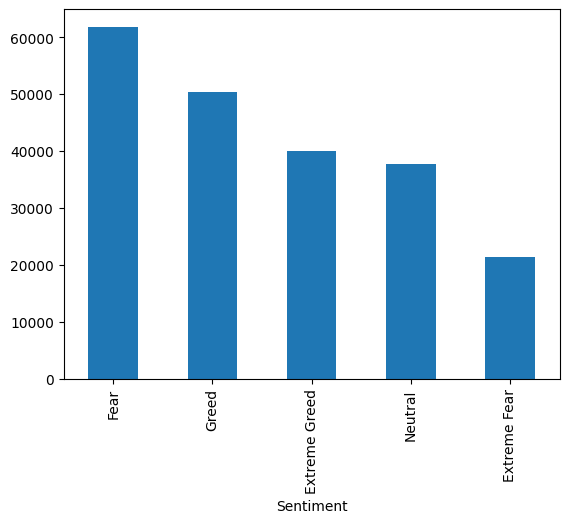

In [9]:
print(merged_df['Sentiment'].value_counts().plot(kind='bar'))

In [10]:
merged_df['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


High number of Long and short openings/closing suggests active Futures(Derivative) Tradings .
Traders are equally closing positions indicating nicely regualted trade activities .


---
Fewer Spot trades than derivatives . Slightly more selling than buying indicates Defensive Sentiment or Profit Booking


---
* **Liquidation**: Forced Position due to high loss
* **Auto Deleveraging**:Closing positions in a volatile Markets to reduce risk by system .
* Very few Auto Deleveraging or liquidation events suggests that overall trader health is good .


---






In [11]:
merged_df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [12]:
##Giving a code to each sentiment
merged_df['Sentiment_Code']=merged_df['Sentiment'].map({'Extreme Fear':2,'Fear':1,'Neutral':0,'Greed':-1,'Extreme Greed':-2})

merged_df['Side_Numeric']=merged_df['Side'].map({'Buy':1,'Sell':0})

Sentiment
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


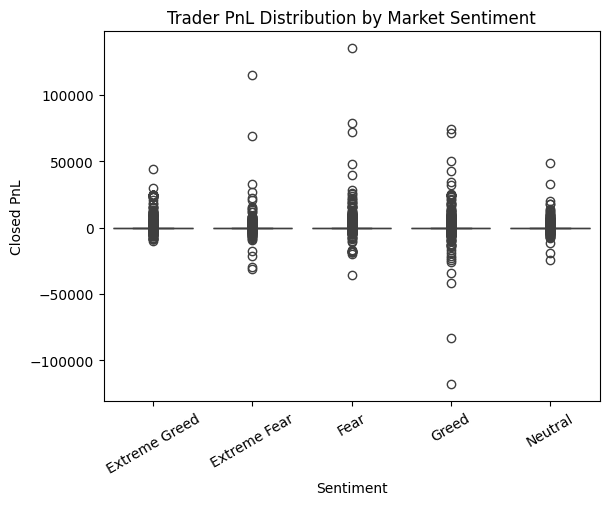

In [13]:
# Average PnL by Sentiment
avg_pnl = merged_df.groupby('Sentiment')['Closed PnL'].mean()
print(avg_pnl)

# Box plot of PnL
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL')
plt.title("Trader PnL Distribution by Market Sentiment")
plt.xticks(rotation=30)
plt.show()

**From the above graph correlating Closed PnL with Sentiment we can see that traders gain the most using the fear sentiment and loose the most when overpowered by greed. However in case of Extreme emotions or neutral sentiments we can see that the Closed Pnl isn't varied much. The closedPnL variation is similar in case of Neutral and Extreme Greed.**


*   Minimum Losses come in case of Extreme Greed
*   Maximum Profit is related to Fear Sentiment
*   Maximum Loss is when a trader is blinded by greed .



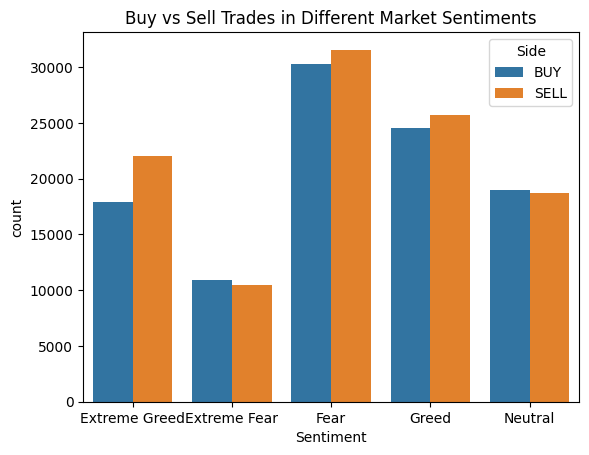

In [14]:
# selling More or buying More in different sentiments
sns.countplot(data=merged_df, x='Sentiment', hue='Side')
plt.title("Buy vs Sell Trades in Different Market Sentiments")
plt.show()



*   **In extreme fear both buying and selling drops as trader want to take very less risk**
*   **In Fear , traders sell comparatively more than buying .**




In [15]:
from scipy.stats import ttest_ind

# Compare PnL in Fear vs. Greed
fear_pnl = merged_df[merged_df['Sentiment'] == 'Fear']['Closed PnL']
greed_pnl = merged_df[merged_df['Sentiment'] == 'Greed']['Closed PnL']

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-Statistic = {t_stat:.2f}, P-Value = {p_val:.4f}")


T-Statistic = 1.85, P-Value = 0.0642


A t-test compares the mean of two groups :
*  and tell us whether the difference is real/significant or occured randomnly
*  A larger t_stat(positive or negative) is a stronger evidence of difference.
*  It measures how different the two means are with respect to variation in data .
*  Our T-stat= 1.85 . So it is a moderate evidence of difference between PnL of fear and PnL of Greed . We can infer from this that the traders performs significantly different in different emotions .
*  But as the p-value>0.05 , it means a weak evidence of difference . It means sentiments have a possible effect but it is weak .  
* A positive t-stat and p-value > 0.05 suggests that the trader performance is better in fear but not significant .


In [16]:
# Compare PnL in Extreme Fear vs. Extreme Greed
extreme_fear_pnl = merged_df[merged_df['Sentiment'] == 'Extreme Fear']['Closed PnL']
extreme_greed_pnl = merged_df[merged_df['Sentiment'] == 'Extreme Greed']['Closed PnL']

t_stat, p_val = ttest_ind(extreme_fear_pnl, extreme_greed_pnl, equal_var=False)
print(f"T-Statistic for extreme fear v/s extreme greed = {t_stat:.2f},and P-Value = {p_val:.4f}")

T-Statistic for extreme fear v/s extreme greed = -3.85,and P-Value = 0.0001


* p-value < 0.01 suggests strong evidence of difference and likely tells that the trader performance differs by sentiment in case of Extreme fear and extreme greed .
* A negative t-stat suggests that the average closed PnL in case of Extreme fear is less than average closed PnL in Extreme greed .
* A negative t-stat and p-value< 0.05 shows that traders perform significantly worse in extreme fear when compared to extreme greed .

In [22]:
# Compare PnL in Fear vs. Neutral Sentiment
fear_pnl = merged_df[merged_df['Sentiment'] == 'Fear']['Closed PnL']
neutral_pnl = merged_df[merged_df['Sentiment'] == 'Neutral']['Closed PnL']

t_stat, p_val = ttest_ind(fear_pnl, neutral_pnl, equal_var=False)
print(f"T-Statistic for fear v/s neutral PnL = {t_stat:.2f},and P-Value = {p_val:.6f}")
t_stat, p_val = ttest_ind(greed_pnl, neutral_pnl, equal_var=False)
print(f"T-Statistic for greed v/s neutral PnL = {t_stat:.2f},and P-Value = {p_val:.4f}")

T-Statistic for fear v/s neutral PnL = 4.34,and P-Value = 0.000015
T-Statistic for greed v/s neutral PnL = 1.49,and P-Value = 0.1350


The t-stat for fear v/s neutral suggests that Average Closed PnL during Fear sentiment is much more than neutral leading to the conclusion that fear is much more benificial in trading .
Also P-value being extremely small provides very strong evidence of difference .


---
For Greed sentiment , the value of t-stat is much lower representing that Greed is not very much beneficial as compared to neutral sentiment of market .
And a very high p-value suggests no significant impact or difference .


---




# **Modelling the data on the basis of Side and Closed PnL**
* Can help us to test whether trade features affect market sentiments
* This can be useful for building smarter bots or detecting market shifts .

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features for modeling
features = ['Side_Numeric', 'Closed PnL']
X = merged_df[features].fillna(0)
y = merged_df['Sentiment_Code'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -2.0       0.32      0.17      0.22      7847
        -1.0       0.36      0.18      0.24     10223
         0.0       0.30      0.15      0.20      7498
         1.0       0.32      0.71      0.44     12296
         2.0       0.26      0.12      0.17      4381

    accuracy                           0.32     42245
   macro avg       0.31      0.27      0.25     42245
weighted avg       0.32      0.32      0.28     42245





*   **Precision** = True positives /(True Positives + False Positives)
*   **Recall** = True positives /(True Positives + False Negatives)
*   **F1-Score** = 2.(Precision*Recall)/(Precision+Recall)
*   **Support** = Number of actual samples in each class





#1.   **Extreme Greed(-2)** :
*  Low Precision , Low recall tells us there are many false positives and false negatives
*  False Positives can be costly . If Extreme Greed is wrongly identified it can lead to riskier trades .


---


#2.   **Greed(-1)** :
*  Precision and Recall both are low and suggesst that prediction of Greed is not done accurately .
*  It is alarming as second most number of samples **(support)** belong to Greed and still the model is not able to generalize .   


---


#3.   **Neutral(0)**:
*  All the metrics are low suggesting there are high number of false positives and false negatives .
*  This suggest that the given trade features are insufficient to detect the sentiments of traders   


---


#4.   **Fear(1)**:
*  Precision is low(more false positives) but recall is high(few false negatives)
*  This suggests an imbalence in the data that's why we need F1 score which is harmonic mean of Precision and recall .
*  The F1 Score of 0.44 suggests that the model is underperforming and weak .


---


#5.   **Extreme Fear(2)**:
*  All the metrics are low . Number of samples (support) for the case of extreme fear is the least
* The F1-score < 0.40 indicates unstability and also is not usable in production .  



# **Lets try some other Models**

In [31]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [32]:
#1. Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['Side_Numeric', 'Closed PnL']
merged_df['Side_Numeric'] = merged_df['Side'].map({'BUY': 1, 'SELL': 0})

# Drop rows with NaN values in either features or target
cleaned_df = merged_df.dropna(subset=features + ['Sentiment_Code'])
X = cleaned_df[features]
y = cleaned_df['Sentiment_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00      7900
        -1.0       0.33      0.00      0.00     10008
         0.0       0.09      0.00      0.00      7462
         1.0       0.30      1.00      0.46     12546
         2.0       0.00      0.00      0.00      4328

    accuracy                           0.30     42244
   macro avg       0.14      0.20      0.09     42244
weighted avg       0.18      0.30      0.14     42244



In [33]:
#2. Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Features for modeling
features = ['Side_Numeric', 'Closed PnL']
X = merged_df[features].fillna(0)
y = merged_df['Sentiment_Code'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00      7972
        -1.0       0.25      0.01      0.01     10113
         0.0       0.18      0.97      0.30      7518
         1.0       0.29      0.03      0.05     12367
         2.0       0.00      0.00      0.00      4275

    accuracy                           0.18     42245
   macro avg       0.14      0.20      0.07     42245
weighted avg       0.18      0.18      0.07     42245



In [34]:
#3. Neural Networks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Features for modeling
features = ['Side_Numeric', 'Closed PnL']
X = merged_df[features].fillna(0)
y = merged_df['Sentiment_Code'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.27      0.01      0.01      7861
        -1.0       0.31      0.38      0.34     10126
         0.0       0.00      0.00      0.00      7576
         1.0       0.31      0.74      0.43     12384
         2.0       0.00      0.00      0.00      4298

    accuracy                           0.31     42245
   macro avg       0.18      0.22      0.16     42245
weighted avg       0.22      0.31      0.21     42245



All the models are performing nice for a particular sentiment .


---


 For Example :
 * Recall metric of fear sentiment for MLP classifier indicates there are only few false negatives and it is very close to ideal case but precision tells story of data imbalance.
 * Naive Bayes does a good job for neutral sentiment with very few false negatives but low precision tells us that there are many false positives .  
 *  Logistic Regression performs worse of all with F1 score of 0 for all sentiments and 0.45 for fear . Precision being set to 0 means our model is not predicting that class even one time

---


Other Models perform worse than the RandomForests. It suggests that more features are needed to predict the market sentiment nicely .


---



# **Conclusion**
# Sentiment & Trader Behavior Analysis

##  Objective
Our goal is to investigate whether market sentiment (Fear or Greed or Extreme case of these emotions) have a significant impact on trader behavior and performance.

---

##  Dataset Overview

We worked with two datasets:
- `fear_greed_index.csv` (Daily market sentiment)
- `historical_data.csv` (Trade-level data from Hyperliquid)

---

##  Data Cleaning and Preprocessing

We aligned timestamp formats and merged sentiment with trade data by date.

---

##  Exploratory Data Analysis (EDA)

- Fear is the leading sentiment for Trade.
- Extreme Greed corressponds to very few and minimal losses.
- PnL distributions are more widespread during 'Greed'.
- A vast amount of trade happens in fear . Trade drops by a large amount in extreme fear .
- Even Trade during Greed is comparatively less than the trade during Fear.
- Fear is also the most profitable sentiment
- Traders are investing in futures more than spot trading .
- There are a few traders flipping positions possibly reacting to sudden market sentiments .

###  Insight:
> Traders seem to take advantage of fear sentiment in market to book profit .

> Market shows balanced long and short trading activities with a slight bias towards long positions . Long Positions indicate that traders expect prices to go up

> Spot Market activity is relatively low compared to Derivatives/Futures , indicating traders are focused on short term profit positions .

> There is slightly more selling than buying in spot suggesting Defensive sentiment or Profit Booking

> Very Few Liquidation and Auto Deleveraging positions represents that overall trader health is good .


---

##  Statistical Testing

We performed a two-sample t-test to compare closedPnL across sentiments.

```python
Sentiments                     | T-stat |  P-value | Inference
Fear V/s Greed                 | 1.85   |  0.0642  |No significant impact
Extreme Fear V/s Extreme Greed |-3.85   |  0.0001  |Extreme Greed MoreProfitable
Fear V/s Neutral               | 4.34   |  0.000015|Fear is beneficial for trade
Greed V/s Neutral              | 1.49   |  0.1350  |No significant impact  
```


---


## Modelling Data
> Random Forests is best of all model tried but underperforms

> Need more features to be analysed for modelling purpose .

> F1 Score is low for all sentiments .
